In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("perceptron_toydata.txt", sep="\t", header=None, names=["x1", "x2", "label"])
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [8]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [9]:
print(type(x_train))

<class 'numpy.ndarray'>


In [10]:
import torch

In [9]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [12]:
print(type(x_train))

<class 'torch.Tensor'>


In [13]:
x_train

tensor([[ 0.7700, -1.1400],
        [-0.3300,  1.4400],
        [ 0.9100, -3.0700],
        [-0.3700, -1.9100],
        [-1.8400, -1.1300],
        [-1.5000,  0.3400],
        [-0.6300, -1.5300],
        [-1.0800, -1.2300],
        [ 0.3900, -1.9900],
        [-1.2600, -2.9000],
        [-5.2700, -0.7800],
        [-0.4900, -2.7400],
        [ 1.4800, -3.7400],
        [-1.6400, -1.9600],
        [ 0.4500,  0.3600],
        [-1.4800, -1.1700],
        [-2.9400, -4.4700],
        [-2.1900, -1.4800],
        [ 0.0200, -0.0200],
        [-2.2400, -2.1200],
        [-3.1700, -3.6900],
        [-4.0900,  1.0300],
        [-2.4100, -2.3100],
        [-3.4500, -0.6100],
        [-3.9600, -2.0000],
        [-2.9500, -1.1600],
        [-2.4200, -3.3500],
        [-1.7400, -1.1000],
        [-1.6100, -1.2800],
        [-2.5900, -2.2100],
        [-2.6400, -2.2000],
        [-2.8400, -4.1200],
        [-1.4500, -2.2600],
        [-3.9800, -1.0500],
        [-2.9700, -1.6300],
        [-0.6800, -1

In [11]:
x_train = x_train.to(torch.float32)

In [17]:
x_train.device

device(type='cpu')

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

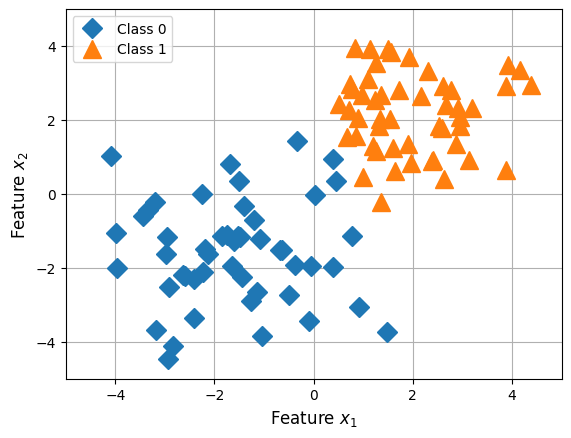

In [21]:
plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [16]:
import torch
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.tensor([2.86, 1.98])
        self.bias = torch.tensor(-3.0)

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias

        return torch.where(weighted_sum_z > 0, torch.tensor(1.0), torch.tensor(0.))

    def forward_all(self, all_x):
        weighted_sum_z = torch.matmul(all_x, self.weights) + self.bias
        print(weighted_sum_z)
        return torch.where(weighted_sum_z > 0, torch.tensor(1.0), torch.tensor(0.))

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        self.weights += error * x

        return error

In [17]:
ppn = Perceptron(num_features=2)
ppn.forward_all(x_train)
# train(ppn, x_train, y_train, 10)

tensor([ -3.0550,  -1.0926,  -6.4760,  -7.8400, -10.4998,  -6.6168,  -7.8312,
         -8.5242,  -5.8248, -12.3456, -19.6166,  -9.8266,  -6.1724, -11.5712,
         -1.0002,  -9.5494, -20.2590, -12.1938,  -2.9824, -13.6040, -19.3724,
        -12.6580, -14.4664, -14.0748, -18.2856, -13.7338, -16.5542, -10.1544,
        -10.1390, -14.7832, -14.9064, -19.2800, -11.6218, -16.4618, -14.7216,
         -7.9544, -10.0774, -11.5272, -16.3210, -12.3280, -13.3950, -13.6260,
         -0.0322,  -7.0040, -12.5876,  -9.4438,  -7.6860,  -7.8378,  -6.2494,
         -9.6044,   9.3838,   4.9684,   7.1750,   4.0224,  15.1016,  13.8300,
          8.0022,   7.4918,   9.0802,  10.2462,   5.5888,  10.1714,   4.4096,
          9.0846,   9.4080,   5.5470,   4.8232,   6.1960,   7.9230,   5.6658,
          3.2898,   8.4334,  15.3480,   6.2950,   1.9940,   9.8656,   2.9202,
          5.0872,   7.7734,   2.5198,   9.0714,   9.5752,   4.8254,   0.7708,
         10.7170,   9.9448,   7.8526,   5.0806,   3.0258,   5.40

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])